# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.146382e+01     1.422773e+01
 * time: 0.0024328231811523438
     1     6.146974e+01     9.161598e+00
 * time: 0.006793022155761719
     2     5.708455e+01     1.267304e+01
 * time: 0.015965938568115234
     3     4.066952e+01     8.476977e+00
 * time: 0.028374910354614258
     4     3.160829e+01     7.781345e+00
 * time: 0.0870208740234375
     5     2.862901e+01     7.232772e+00
 * time: 0.09774494171142578
     6     1.355585e+01     3.389714e+00
 * time: 0.1084299087524414
     7     8.546396e+00     2.200776e+00
 * time: 0.1173558235168457
     8     7.437216e+00     3.109943e+00
 * time: 0.12630295753479004
     9     6.758262e+00     2.216271e+00
 * time: 0.13533496856689453
    10     5.954253e+00     1.351435e+00
 * time: 0.14419794082641602
    11     5.642993e+00     1.272984e+00
 * time: 0.15145492553710938
    12     5.402694e+00     9.430419e-01
 * time: 0.15870404243469238
    13     5.266941e+00     6.967441e-01
 * tim

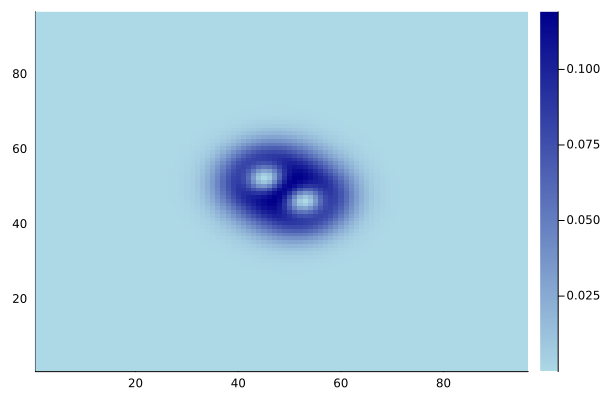

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)